## Ising Hamiltonian with Long range System

In [1]:
from src.utils_sparse_diag import adj_generator,ising_coupling,ising_external_field,get_gs,functional_f,compute_magnetization
from typing import List,Tuple
import matplotlib.pyplot as plt
import quspin
from quspin.basis import spin_basis_1d
import numpy as np

#### First step: Define the Adjacency matrix and Create the Coupling Hamiltonian

Define the Callable. The callable is a function that returns the adjacency values for a given index

In [2]:
class LongRange():
    def __init__(self,alpha:int,j0:float) -> None:
        self.alpha=alpha
        self.j0=j0

    def long_range(self,i:int,l:int)->Tuple[List[int],List[float]]:
        jdx=[]
        values=[]
        for j in range(l):
            jdx.append((j+i)%l) #append the pbc index
            # the traslational invariance leads to a i-independent relation
            if j==0:
                values.append(self.j0/(l**self.alpha))
            else:
                values.append(self.j0/((l+j)**self.alpha)+self.j0/((j)**self.alpha))
        return jdx,values


l=12
alpha=4
j0=1.

Define the Adjacency given the callable. We now create the $J_{ad}$

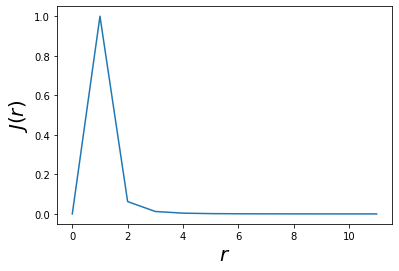

{(0, 0): 4.8225308641975306e-05, (0, 1): 1.0000350127796647, (0, 2): 0.06252603082049146, (0, 3): 0.01236543209876543, (0, 4): 0.0039215087890625, (0, 5): 0.0016119730367213038, (0, 6): 0.0007811309251638469, (0, 7): 0.00042416648825810795, (0, 8): 0.000250390625, (0, 9): 0.00015755768074332186, (0, 10): 0.00010426883409603169, (0, 11): 7.187480332146352e-05, (1, 1): 4.8225308641975306e-05, (1, 2): 1.0000350127796647, (1, 3): 0.06252603082049146, (1, 4): 0.01236543209876543, (1, 5): 0.0039215087890625, (1, 6): 0.0016119730367213038, (1, 7): 0.0007811309251638469, (1, 8): 0.00042416648825810795, (1, 9): 0.000250390625, (1, 10): 0.00015755768074332186, (1, 11): 0.00010426883409603169, (1, 0): 7.187480332146352e-05, (2, 2): 4.8225308641975306e-05, (2, 3): 1.0000350127796647, (2, 4): 0.06252603082049146, (2, 5): 0.01236543209876543, (2, 6): 0.0039215087890625, (2, 7): 0.0016119730367213038, (2, 8): 0.0007811309251638469, (2, 9): 0.00042416648825810795, (2, 10): 0.000250390625, (2, 11): 0.0

In [3]:
longrange=LongRange(alpha=alpha,j0=j0)
adj=adj_generator(l=l,f=longrange.long_range)

#print(adj)
plt.plot([adj[(0,i)] for i in range(l)])
plt.xlabel(r'$r$',fontsize=20)
plt.ylabel(r'$J(r)$',fontsize=20)
plt.show()

print(adj)


Create the universal term in the Hamiltonian

In [4]:
ham0,f=ising_coupling(adj=adj,l=l,basis=spin_basis_1d(l),direction='zz')

#### Define the external field Hamiltonian

Define the disorder external field

In [5]:
hmax=3
h=np.random.uniform(0,hmax,size=(l))
#data=np.load('data/dataset_long_range/unet_long_range_pbc_4.0_alpha_3_h_1.0_j_20_l_301_n lanczos.npz')
#h=data['potential'][8]

Define the external term

In [6]:
vx=ising_external_field(h=h,l=l,basis=spin_basis_1d(l),direction='x')

#### Get the Ground state and the expectation values

Define the total Hamiltonian

In [7]:
ham_tot=ham0+vx

Get the energy and the GS

In [11]:
e,psi=get_gs(ham=ham_tot,eightype='std',basis=spin_basis_1d(l),lanczos_dim=50)
print(e/l)

[-1.98499981]


Find the expectation values

In [12]:
f_ev=functional_f(psi=psi,l=l,f_density_op=f)
x=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='x')
z=compute_magnetization(psi=psi,l=l,basis=spin_basis_1d(l),direction='z')
print(f_ev.shape)
f_ev=np.average(f_ev,axis=1) #this average makes the observable scalable

(12, 12)


Plot the results

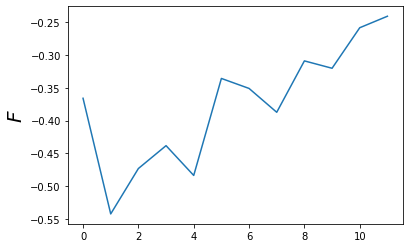

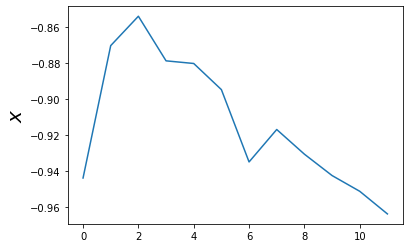

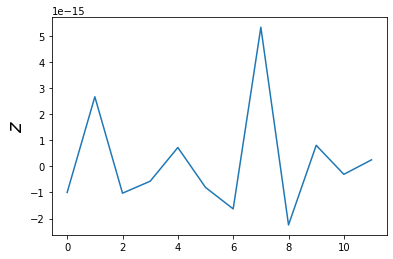

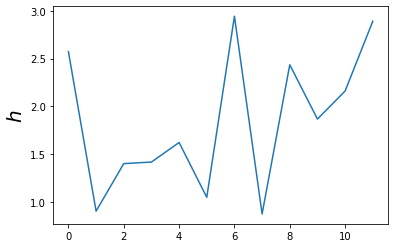

[-0.28153254]
-0.28153253999388483


In [13]:
plt.plot(16*f_ev)
plt.ylabel(r'$F$',fontsize=20)
plt.show()
plt.plot(x)
plt.ylabel(r'$x$',fontsize=20)
plt.show()
plt.plot(z)
plt.ylabel(r'$z$',fontsize=20)
plt.show()
plt.plot(h)
plt.ylabel(r'$h$',fontsize=20)
plt.show()

print(e/l-np.average(x*h))
print(np.average(f_ev)*l)